## [Note](https://docs.google.com/document/d/1FSPNZFQsnaUVeTo0OQ2RrEZ0f4el9bIGI5sQALbG_F0/edit)

### Hello World Example

In [31]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.9.0


In [3]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant('Hello World!')
x = tf.add(a, b)
with tf.Session() as sess:
    print(sess.run(c))
    print('{}+{}={}'.format(sess.run(a), sess.run(b), sess.run(x)))

b'Hello World!'
2+3=5


### Tensorboard

In [33]:
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
x = tf.add(a, b, name='add_ab')
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess:
    print(sess.run(x))
writer.close()

5


### Variables

In [34]:
print(tf.get_default_graph().as_graph_def())

node {
  name: "Add/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "Add/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 5
      }
    }
  }
}
node {
  name: "Add"
  op: "Add"
  input: "Add/x"
  input: "Add/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  a

#### Initialize Variables

In [49]:
tf.reset_default_graph()

In [50]:
a = tf.get_variable('a', shape=1)
b = tf.constant(3, name='b')

In [51]:
with tf.Session() as sess:
    print(sess.run(b))

3


In [52]:
with tf.Session() as sess:
    print(sess.run(a, feed_dict={a: [5]}))

[5.]


In [55]:
tf.reset_default_graph()
a = tf.get_variable('a', shape=1, dtype=tf.int32)
b = tf.constant(3, name='b')
x = tf.add(a, b, name='add')
with tf.Session() as sess:
    print(sess.run(tf.report_uninitialized_variables()))

[b'a']


In [56]:
tf.reset_default_graph()
a = tf.get_variable('a', shape=1, dtype=tf.int32, initializer=tf.zeros_initializer())
b = tf.constant(3, name='b')
x = tf.add(a, b, name='add')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(tf.report_uninitialized_variables()))

[]


In [58]:
with tf.Session() as sess:
    print(sess.run(x, feed_dict={a: [0]}))

[3]


In [72]:
tf.reset_default_graph()
a = tf.get_variable('a', shape=1, dtype=tf.int32, initializer=tf.zeros_initializer())
b = tf.get_variable('b', shape=1, dtype=tf.int32, initializer=tf.zeros_initializer())
c = tf.constant(3, name='c')
d = tf.get_variable('d', shape=1, dtype=tf.int32, initializer=tf.zeros_initializer())
a_add_b = tf.add(a, b, name='a_add_b')
c_add_d = tf.add(c, d, name='c_add_d')
output = tf.add(a_add_b, c_add_d, name='final_add')

In [73]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(output, feed_dict={a: [0],
                                b: [1],
                                d: [2]}))

[6]


In [74]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(c.eval())

3


In [66]:
import numpy as np

In [67]:
a = np.zeros((2, 2))

In [68]:
a

array([[0., 0.],
       [0., 0.]])

In [69]:
b = np.zeros_like(a)

In [70]:
b

array([[0., 0.],
       [0., 0.]])

### Importing Data

#### placeholder

In [8]:
tf.reset_default_graph()
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)
x = tf.add(a, b, name='add')
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess:
    print(sess.run(x, feed_dict={a: [1, 2, 3]}))
writer.close()

[6. 7. 8.]


#### tf.dataset

In [75]:
import numpy as np

In [76]:
x = np.arange(0, 15)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [77]:
dx = tf.data.Dataset.from_tensor_slices(x)

In [78]:
iteraor = dx.make_one_shot_iterator()

In [79]:
next_element = iterator.get_next()

In [83]:
tf.reset_default_graph()
import numpy as np
x = np.arange(0, 15)
dx = tf.data.Dataset.from_tensor_slices(x)
iterator = dx.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
    for i in range(15):
        val = sess.run(next_element)
        print(val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [10]:
import sklearn.datasets
digits = sklearn.datasets.load_digits(return_X_y=True)
print(digits[0].shape, digits[1].shape)

(1797, 64) (1797,)


In [11]:
# split into train and validation sets
train_images = digits[0][:int(len(digits[0]) * 0.8)]
train_labels = digits[1][:int(len(digits[0]) * 0.8)]
valid_images = digits[0][int(len(digits[0]) * 0.8):]
valid_labels = digits[1][int(len(digits[0]) * 0.8):]

In [12]:
print(train_images.shape, train_labels.shape)

(1437, 64) (1437,)


In [84]:
x = range(1, 6)
y = range(6, 11)
for a in zip(x, y):
    print(a)

(1, 6)
(2, 7)
(3, 8)
(4, 9)
(5, 10)


In [23]:
tf.reset_default_graph()
# create the training datasets
dx_train = tf.data.Dataset.from_tensor_slices(train_images)
dx_valid = tf.data.Dataset.from_tensor_slices(valid_images)
# apply a one-hot transformation to each label for use in the neural network
dy_train = tf.data.Dataset.from_tensor_slices(train_labels).map(lambda z: tf.one_hot(z, 10))
dy_valid = tf.data.Dataset.from_tensor_slices(valid_labels).map(lambda z: tf.one_hot(z, 10))
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(500).repeat().batch(30)
valid_dataset = tf.data.Dataset.zip((dx_valid, dy_valid)).shuffle(500).repeat().batch(30)

In [24]:
# create general iterator
iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                           train_dataset.output_shapes)
next_element = iterator.get_next()
# make datasets that we can initialize separately, but using the same structure via the common iterator
training_init_op = iterator.make_initializer(train_dataset)
validation_init_op = iterator.make_initializer(valid_dataset)

In [15]:
def make_thumbnail(img, n_row, n_col):
    w = int(np.sqrt(img.shape[1]))
    tbn = np.zeros((n_row*w, n_col*w))
    for cnt, vec in enumerate(img):
        row_cnt = cnt // n_col
        col_cnt = cnt % n_col
        tbn[row_cnt*w:(row_cnt+1)*w, col_cnt*w:(col_cnt+1)*w] = np.reshape(vec, (w, w))
    return tbn

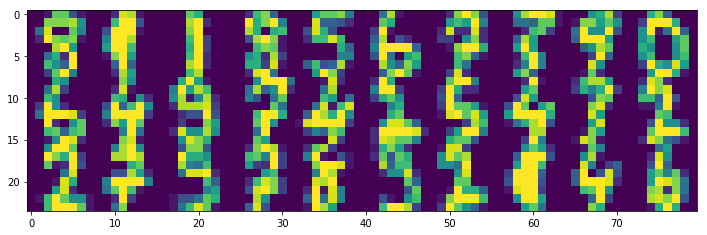

In [16]:
import matplotlib.pyplot as plt
with tf.Session() as sess:
    sess.run(training_init_op)
    img, lbl = sess.run(next_element)
    plt.figure(figsize=(12, 6))
    plt.imshow(make_thumbnail(img, 3, 10))
    plt.show()
    sess.run(validation_init_op)
    img, lbl = sess.run(next_element)
    plt.figure(figsize=(12, 6))
    plt.imshow(make_thumbnail(img, 3, 10))
    plt.show()